In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/data_missing.csv', encoding='utf-8')

In [24]:
df.shape

(10, 5)

In [25]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

In [26]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [27]:
df.describe()#.round()

,Date,Temp,Humid
count,10.00000,7.000000,9.000000
mean,5.50000,16.142857,36.766667
std,3.02765,3.184785,7.343705
min,1.00000,12.000000,25.700000
25%,3.25000,14.000000,30.200000
50%,5.50000,15.000000,35.000000
75%,7.75000,19.000000,45.000000
max,10.00000,20.000000,45.000000


In [28]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

<Axes: >

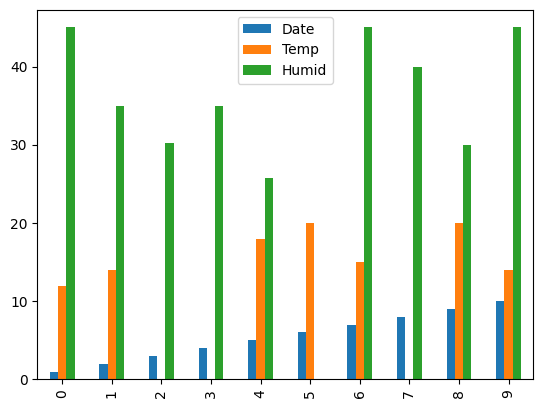

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot.bar()

In [30]:
# ws02
df.Date = df.Date.astype('category')

In [31]:
df.dtypes

Date     category
Zone       object
Temp      float64
Humid     float64
Rain       object
dtype: object

In [32]:
df.describe()

,Temp,Humid
count,7.000000,9.000000
mean,16.142857,36.766667
std,3.184785,7.343705
min,12.000000,25.700000
25%,14.000000,30.200000
50%,15.000000,35.000000
75%,19.000000,45.000000
max,20.000000,45.000000


In [33]:
# ws03
df.isnull()

,Date,Zone,Temp,Humid,Rain
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,True
3,False,False,True,False,False
4,False,False,False,False,False
5,False,False,False,True,False
6,False,True,False,False,False
7,False,False,True,False,True
8,False,False,False,False,False
9,False,False,False,False,False


In [34]:
df.isnull().any()

Date     False
Zone      True
Temp      True
Humid     True
Rain      True
dtype: bool

In [35]:
df.isnull().sum()

Date     0
Zone     1
Temp     3
Humid    1
Rain     2
dtype: int64

In [36]:
df.notnull()

,Date,Zone,Temp,Humid,Rain
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,False,True,False
3,True,True,False,True,True
4,True,True,True,True,True
5,True,True,True,False,True
6,True,False,True,True,True
7,True,True,False,True,False
8,True,True,True,True,True
9,True,True,True,True,True


In [37]:
df.notnull().any()

Date     True
Zone     True
Temp     True
Humid    True
Rain     True
dtype: bool

In [38]:
df.notnull().sum()

Date     10
Zone      9
Temp      7
Humid     9
Rain      8
dtype: int64

In [60]:

missing_count = df.isnull().sum()

total_cells = np.prod(df.shape)
total_missing = missing_count.sum()


missing_percent = total_missing *100 /total_cells

print('Total cells: {}' . format(total_cells))
print('Total missing values: {}' . format(total_missing))
print('missing: {} %' . format(missing_percent))

Total cells: 50
Total missing values: 3
missing: 6.0 %


In [42]:
# ws04
df.columns

Index(['Date', 'Zone', 'Temp', 'Humid', 'Rain'], dtype='object')

In [43]:
df.Temp.isnull().sum()

np.int64(3)

In [44]:
df.Temp.isnull()

0    False
1    False
2     True
3     True
4    False
5    False
6    False
7     True
8    False
9    False
Name: Temp, dtype: bool

In [45]:
# ws05
df[df.Temp.isnull()]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
7,8,Y,NaN,40.0,NaN


In [46]:
df[df.Rain.isnull()]

,Date,Zone,Temp,Humid,Rain
2,3,E,NaN,30.2,NaN
7,8,Y,NaN,40.0,NaN


In [47]:
df[df.Humid.isnull()]

,Date,Zone,Temp,Humid,Rain
5,6,N,20.0,NaN,800.8


In [62]:
df[df.isnull().any(axis=1)]

,Date,Zone,Temp,Humid,Rain
2,3,E,99.0,30.2,NaN
6,7,NaN,15.0,45.0,950
7,8,Y,99.0,40.0,NaN


In [49]:
df[df.isnull().any(axis=1)].index

Index([2, 3, 5, 6, 7], dtype='int64')

In [50]:
# ws06
df.describe()

,Temp,Humid
count,7.000000,9.000000
mean,16.142857,36.766667
std,3.184785,7.343705
min,12.000000,25.700000
25%,14.000000,30.200000
50%,15.000000,35.000000
75%,19.000000,45.000000
max,20.000000,45.000000


In [51]:
df.dtypes

Date     category
Zone       object
Temp      float64
Humid     float64
Rain       object
dtype: object

In [52]:
colm = 'Humid'
df[colm] = df[colm].fillna(df[colm].mean())

In [53]:
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.000000,1000
1,2,S,14.0,35.000000,--
2,3,E,NaN,30.200000,NaN
3,4,W,NaN,35.000000,700.5
4,5,N,18.0,25.700000,1600
5,6,N,20.0,36.766667,800.8
6,7,NaN,15.0,45.000000,950
7,8,Y,NaN,40.000000,NaN
8,9,Y,20.0,30.000000,1800
9,10,none,14.0,45.000000,90.5


In [54]:
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [55]:
colm = 'Humid'
df[colm] = df[colm].fillna(df[colm].median())
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,35.0,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [56]:
# ws07
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

colm = ['Humid','Temp']
df[colm] = df[colm].fillna(99)

In [57]:
# ws08
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain      object
dtype: object

In [58]:
colm = 'Rain'
df[colm] = df[colm].fillna(df[colm].mean())

TypeError: can only concatenate str (not "int") to str

In [64]:
df.Rain = pd.to_numeric(df.Rain,errors='coerce')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000.0
1,2,S,14.0,35.0,NaN
2,3,E,99.0,30.2,NaN
3,4,W,99.0,35.0,700.5
4,5,N,18.0,25.7,1600.0
5,6,N,20.0,99.0,800.8
6,7,NaN,15.0,45.0,950.0
7,8,Y,99.0,40.0,NaN
8,9,Y,20.0,30.0,1800.0
9,10,none,14.0,45.0,90.5


In [65]:
df.dtypes

Date       int64
Zone      object
Temp     float64
Humid    float64
Rain     float64
dtype: object

In [66]:
colm = 'Rain'
df[colm] = df[colm].fillna(df[colm].mean())
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000.000000
1,2,S,14.0,35.0,991.685714
2,3,E,99.0,30.2,991.685714
3,4,W,99.0,35.0,700.500000
4,5,N,18.0,25.7,1600.000000
5,6,N,20.0,99.0,800.800000
6,7,NaN,15.0,45.0,950.000000
7,8,Y,99.0,40.0,991.685714
8,9,Y,20.0,30.0,1800.000000
9,10,none,14.0,45.0,90.500000


In [92]:
# ws09
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [94]:
df.fillna(method='pad', inplace=True)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15512\815984255.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad', inplace=True)


,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,14.0,30.2,--
3,4,W,14.0,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,25.7,800.8
6,7,N,15.0,45.0,950
7,8,Y,15.0,40.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [69]:

df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [70]:
df.fillna(method='pad', limit=1, inplace=True)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15512\2830856118.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad', limit=1, inplace=True)


,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,14.0,30.2,--
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,25.7,800.8
6,7,N,15.0,45.0,950
7,8,Y,15.0,40.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [71]:
# ws10
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [72]:
df.fillna(method='bfill', inplace=True)
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15512\3129340724.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,18.0,30.2,700.5
3,4,W,18.0,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,45.0,800.8
6,7,Y,15.0,45.0,950
7,8,Y,20.0,40.0,1800
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [73]:
# ws11
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [74]:
df.dropna(inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
4,5,N,18.0,25.7,1600
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [75]:
# ws12
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [76]:
df.dropna(subset=['Temp', 'Humid'], inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
4,5,N,18.0,25.7,1600
6,7,NaN,15.0,45.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [77]:
# ws13
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [78]:
df.dropna(axis='columns', inplace=True)
df

,Date
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [79]:
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [80]:
df.dropna(thresh=8, axis=1, inplace=True) 
df

,Date,Zone,Humid,Rain
0,1,N,45.0,1000
1,2,S,35.0,--
2,3,E,30.2,NaN
3,4,W,35.0,700.5
4,5,N,25.7,1600
5,6,N,NaN,800.8
6,7,NaN,45.0,950
7,8,Y,40.0,NaN
8,9,Y,30.0,1800
9,10,none,45.0,90.5


In [96]:
df.dropna(thresh=7, axis=1, inplace=True)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,14.0,30.2,--
3,4,W,14.0,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,25.7,800.8
6,7,N,15.0,45.0,950
7,8,Y,15.0,40.0,950
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [82]:
df.shape

(10, 4)

In [83]:
# ws15
df.loc[[0,4],:] = np.nan
df

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
4,NaN,NaN,NaN,NaN
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [84]:
df[df.isnull().any(axis=1)]

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
2,3.0,E,30.2,NaN
4,NaN,NaN,NaN,NaN
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN


In [85]:
df[df.isnull().all(axis=1)]

,Date,Zone,Humid,Rain
0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [86]:
df.dropna(how='all', inplace=True)
df

,Date,Zone,Humid,Rain
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [87]:
df['location'] = np.nan
df

,Date,Zone,Humid,Rain,location
1,2.0,S,35.0,--,NaN
2,3.0,E,30.2,NaN,NaN
3,4.0,W,35.0,700.5,NaN
5,6.0,N,NaN,800.8,NaN
6,7.0,NaN,45.0,950,NaN
7,8.0,Y,40.0,NaN,NaN
8,9.0,Y,30.0,1800,NaN
9,10.0,none,45.0,90.5,NaN


In [88]:
# ws16
df.dropna(axis=1, how='all', inplace=True)
df

,Date,Zone,Humid,Rain
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [89]:
df

,Date,Zone,Humid,Rain
1,2.0,S,35.0,--
2,3.0,E,30.2,NaN
3,4.0,W,35.0,700.5
5,6.0,N,NaN,800.8
6,7.0,NaN,45.0,950
7,8.0,Y,40.0,NaN
8,9.0,Y,30.0,1800
9,10.0,none,45.0,90.5


In [90]:
df = pd.read_csv('data/data_missing.csv', encoding='utf-8')
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000
1,2,S,14.0,35.0,--
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800
9,10,none,14.0,45.0,90.5


In [91]:
# ws17
missing_vals = ['n/a','na','--','none']
df = pd.read_csv('data/data_missing.csv', na_values=missing_vals)
df

,Date,Zone,Temp,Humid,Rain
0,1,N,12.0,45.0,1000.0
1,2,S,14.0,35.0,NaN
2,3,E,NaN,30.2,NaN
3,4,W,NaN,35.0,700.5
4,5,N,18.0,25.7,1600.0
5,6,N,20.0,NaN,800.8
6,7,NaN,15.0,45.0,950.0
7,8,Y,NaN,40.0,NaN
8,9,Y,20.0,30.0,1800.0
9,10,NaN,14.0,45.0,90.5
